In [1]:
# To prepare for using stuff later

#plotting
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#data manipulation
import pandas as pd

#getting fasta records
from spartan.utils.fastas import ParseFastA


# Mapping the transcripts (Tx) to the genome.

The following `qsub` script was used to send the job to the cluster to generate the Tx alignments to the glossina_fuscipes_23399126863023 genome:

```
#!/bin/zsh
#PBS -N align_tx
#PBS -l nodes=1:ppn=8
#PBS -l pmem=2000MB
#PBS -M gus.dunn@yale.edu
#PBS -m abe
#PBS -l walltime=24:00:00
#PBS -o $HOME/qsub_out/align_tx.20140903.out
#PBS -e $HOME/qsub_out/align_tx.20140903.err

export PATH="${PBS_O_PATH}:${PATH}"

OUTDIR=/home2/wd238/data/glossina_fuscipes/gmap_out/

# Map to OUR genome
gmap -D /home2/wd238/data/glossina_fuscipes/indexes -d glossina_fuscipes_23399126863023 -B 5 -A -f gff3_gene -t 6 /scratch/ag674/GFuscipes_transcriptome/Trinity_Gff1-3_ORF.fa > $OUTDIR/glossina_fuscipes_23399126863023_v_Trinity_Gff1-3_ORF.genes.gff

# Map to VectorBase genome
gmap -D /home2/wd238/data/glossina_fuscipes/indexes -d glossina_fuscipes_GfusI1 -B 5 -A -f gff3_gene -t 6 /scratch/ag674/GFuscipes_transcriptome/Trinity_Gff1-3_ORF.fa > $OUTDIR/glossina_fuscipes_GfusI1_v_Trinity_Gff1-3_ORF.genes.gff
```

# Counting the SNPs in proximity windows (500...

The following script was used on an interactive `qsub` session to generate the counts:

__NOT ACCURATE:__

Name: `/home2/wd238/scripts/Tsetse_RAD_53_v_Gff23399_Tx.windows.sh`
```
OUT_DIR=$HOME/projects/ddrad58

VCF=/home/ag674/tsetseRAD14/Tsetse_RAD_53indFnamed.vcf
GFF3=$HOME/data/glossina_fuscipes/gmap_out/glossina_fuscipes_23399126863023_v_Trinity_Gff1-3_ORF.genes.gff


LENGTH=500
grep 'gene' $GFF3 | bedtools window -a stdin -b $VCF -c -w $LENGTH > ${OUT_DIR}/Tsetse_RAD_53_v_Gff23399_Tx.window.${LENGTH}.tsv

LENGTH=1000
grep 'gene' $GFF3 | bedtools window -a stdin -b $VCF -c -w $LENGTH > ${OUT_DIR}/Tsetse_RAD_53_v_Gff23399_Tx.window.${LENGTH}.tsv

LENGTH=5000
grep 'gene' $GFF3 | bedtools window -a stdin -b $VCF -c -w $LENGTH > ${OUT_DIR}/Tsetse_RAD_53_v_Gff23399_Tx.window.${LENGTH}.tsv

LENGTH=10000
grep 'gene' $GFF3 | bedtools window -a stdin -b $VCF -c -w $LENGTH > ${OUT_DIR}/Tsetse_RAD_53_v_Gff23399_Tx.window.${LENGTH}.tsv

```

# Exploration of SNP counts.

In [2]:
# load the data files
w500 = "/home2/wd238/projects/ddrad58/Tsetse_RAD_53_v_Gff23399_Tx.window.500.tsv"
w1000 = "/home2/wd238/projects/ddrad58/Tsetse_RAD_53_v_Gff23399_Tx.window.1000.tsv"
w5000 = "/home2/wd238/projects/ddrad58/Tsetse_RAD_53_v_Gff23399_Tx.window.5000.tsv"
w10000 = "/home2/wd238/projects/ddrad58/Tsetse_RAD_53_v_Gff23399_Tx.window.10000.tsv"

header_values = ["seqname",
                 "source",
                 "feature",
                 "start",
                 "end",
                 "score",
                 "strand",
                 "frame",
                 "attributes",
                 "snp_count"]

w500 = pd.read_table(w500, sep='\t', names=header_values)
w1000 = pd.read_table(w1000,sep='\t', names=header_values)
w5000 = pd.read_table(w5000,sep='\t', names=header_values)
w10000 = pd.read_table(w10000,sep='\t', names=header_values)

### Peek at what these data look like

In [3]:
w500.head()

,seqname,source,feature,start,end,score,strand,frame,attributes,snp_count
0,Scaffold399,glossina_fuscipes_23399126863023,gene,98034,98291,.,+,.,ID=m.191041.path1;Name=m.191041,1
1,Scaffold668,glossina_fuscipes_23399126863023,gene,9168,9353,.,+,.,ID=m.2386.path1;Name=m.2386,0
2,Scaffold28,glossina_fuscipes_23399126863023,gene,974641,974855,.,+,.,ID=m.191034.path1;Name=m.191034,0
3,Scaffold266,glossina_fuscipes_23399126863023,gene,271862,276901,.,-,.,ID=m.184863.path1;Name=m.184863,3
4,Scaffold467,glossina_fuscipes_23399126863023,gene,228997,230018,.,-,.,ID=m.184866.path1;Name=m.184866,0


## Distributions:

In [4]:
# function to plot histograms of our counts
def snp_hist(data, bins=20, title=None):
    plt.hist(data, bins=bins, histtype=u'stepfilled', log=1)
    plt.xlabel("SNPs")
    plt.ylabel("Number of Tx")
    if title:
        plt.title(title)

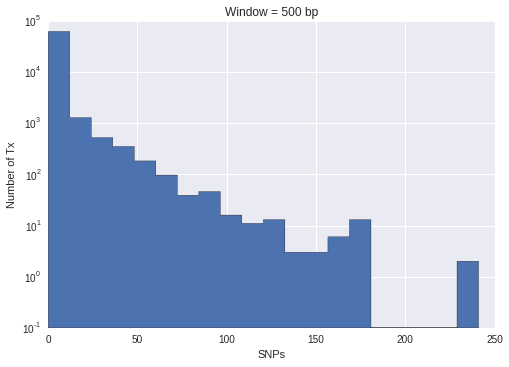

In [5]:
snp_hist(w500["snp_count"],title="Window = 500 bp")

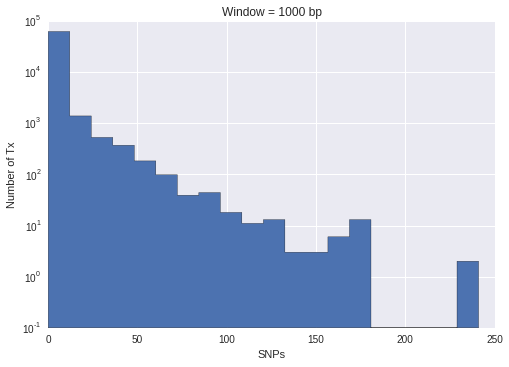

In [6]:
snp_hist(w1000["snp_count"],title="Window = 1000 bp")

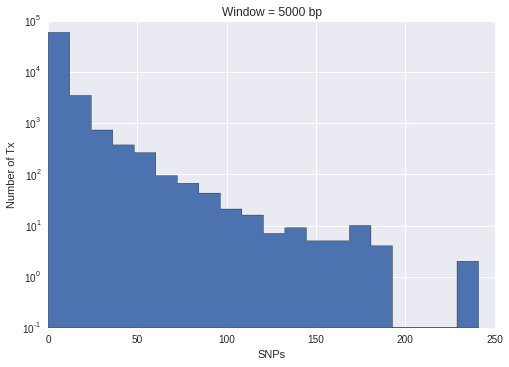

In [7]:
snp_hist(w5000["snp_count"],title="Window = 5000 bp")

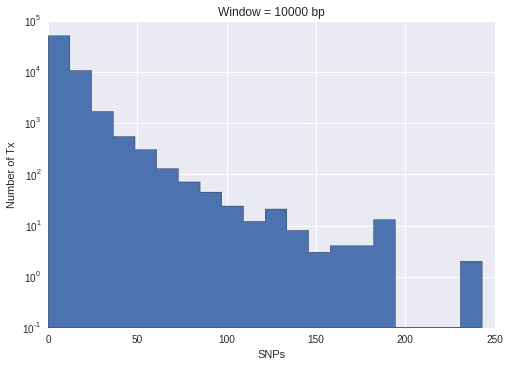

In [8]:
snp_hist(w10000["snp_count"],title="Window = 10000 bp")

## Lets look at some genes:

Looks like a few genes have more than 150 SNPs within even 500 bp. Lets find out which ones.

In [9]:
w500[w500.snp_count >= 150].sort(columns='snp_count', ascending=False)

,seqname,source,feature,start,end,score,strand,frame,attributes,snp_count
47128,Scaffold214,glossina_fuscipes_23399126863023,gene,56884,479976,.,-,.,ID=m.135627.path1;Name=m.135627,241
47124,Scaffold214,glossina_fuscipes_23399126863023,gene,76840,479976,.,-,.,ID=m.135635.path1;Name=m.135635,235
55376,Scaffold19,glossina_fuscipes_23399126863023,gene,1353000,1640192,.,-,.,ID=m.157581.path1;Name=m.157581,177
55349,Scaffold19,glossina_fuscipes_23399126863023,gene,1353000,1640192,.,-,.,ID=m.157595.path1;Name=m.157595,177
55352,Scaffold19,glossina_fuscipes_23399126863023,gene,1353000,1640192,.,-,.,ID=m.157601.path1;Name=m.157601,177
55363,Scaffold19,glossina_fuscipes_23399126863023,gene,1353000,1640192,.,-,.,ID=m.157632.path1;Name=m.157632,177
50553,Scaffold59,glossina_fuscipes_23399126863023,gene,384634,620652,.,+,.,ID=m.145220.path1;Name=m.145220,175
55360,Scaffold19,glossina_fuscipes_23399126863023,gene,1359276,1640192,.,-,.,ID=m.157626.path1;Name=m.157626,171
55370,Scaffold19,glossina_fuscipes_23399126863023,gene,1359226,1640192,.,-,.,ID=m.157574.path1;Name=m.157574,171
55367,Scaffold19,glossina_fuscipes_23399126863023,gene,1359276,1640192,.,-,.,ID=m.157567.path1;Name=m.157567,171


- A couple genes on `Scaffold214` (`m.135627` and `m.135635`) seem to have a lot of SNPs near by (241 and 235 SNPs, respectively).  Lets get the sequences and see if we can figure out what they are.
- **NOTE:** Actually it seems that these are overlapping gene models.  This is the kind of thing that **hopefully** will be avoided when we get access to their **actual** gene models and not just my quick-and-dirty annotation.

In [12]:
# Load the Trinity Txs
fastas = ParseFastA('/scratch/ag674/GFuscipes_transcriptome/Trinity_Gff1-3_ORF.fa').to_dict()

In [14]:
fastas["m.135627"]

'CAGCAACAACAGCAGCAACAACCACCACATCCAGCACATCAGCAACCACCGCATCCCCAACATCAGCAGCATGGTCCACCCCATCCTTCGCAAATGTCATCGCATCAATTTAATTCGAATTTGCTAAATCACGCTATGAACAATCCGGCCGCTGCGGCAGCTGCAGCTGCAGCTATTGCGGCCGGTATGCCGCACATGCAATTGCCACCAGCTATGCAGAGTGGCAATATTTATGATCATCCCGGCGTTCATCCGGGTGTAGGAATGAATGGAGTAGGTGTTCCAAAACCGCCCCAACCTGGACAACCAGGTCCCGGCGAATTGGTATATTTAGGCGGACAACCCCATGCAGCGGCTGCAGCCGCTTTGGGCATGATGCCACAAAATCAATTTCTAAGTAATCAAGCAGCTGCCGCAGCTGCGGCTGCTAATCGCAATGCTGCAGCGATTACTACATCCACTGCCAAAAAGCTATGGGAGAAATCCGATGGCAAAGGTGCCTCTACCGGTGGCCCCTTAAATCCCTTACATATTGGGGATCCACACGTTTGGAAAGATTCACCATGGTCGACGCAAGGAGAAACTATATTACCCAGGCCACGTACTTTTCCCCAGGCACCAGATACAACAGTGAGCGCAAATGCCGGAATATTAAGTCCTCGCGATTCGACAAGTGGTCTGGGAGTTAAAATGGTTGAATACGTTTTAGGAGGATCGCCGACAAATAAAGACAGTCCTTTGTCAGGCTTGGAACCACGACTGAGAAGCTTAAAATTCGATGATAGTGATAAGTCACACGATGATAAAGAGAAGGGGAATTCACCATTTGATTCAAATGGCTTAAAGAAGGATGATCAAGTCACCGGAACAAATGGTGTTGTCAACGGTATCGATGATGATAAAGGATTCAACCGTACACCGGGTTCGCGTCAACCTTCACCAGCTGAAGAATCTCTACCACGACCACCCACTTTACTTGATCCTACGCAACATGGTGTC

In [15]:
fastas["m.135635"]

'CAGCAACAACAGCAGCAACAACCACCACATCCAGCACATCAGCAACCACCGCATCCCCAACATCAGCAGCATGGTCCACCCCATCCTTCGCAAATGTCATCGCATCAATTTAATTCGAATTTGCTAAATCACGCTATGAACAATCCGGCCGCTGCGGCAGCTGCAGCTGCAGCTATTGCGGCCGGTATGCCGCACATGCAATTGCCACCAGCTATGCAGAGTGGCAATATTTATGATCATCCCGGCGTTCATCCGGGTGTAGGAATGAATGGAGTAGGTGTTCCAAAACCGCCCCAACCTGGACAACCAGGTCCCGGCGAATTGGTATATTTAGGCGGACAACCCCATGCAGCGGCTGCAGCCGCTTTGGGCATGATGCCACAAAATCAATTTCTAAGTAATCAAGCAGCTGCCGCAGCTGCGGCTGCTAATCGCAATGCTGCAGCGATTACTACATCCACTGCCAAAAAGCTATGGGAGAAATCCGATGGCAAAGGTGCCTCTACCGGTGGCCCCTTAAATCCCTTACATATTGGGGATCCACACGTTTGGAAAGATTCACCATGGTCGACGCAAGGAGAAACTATATTACCCAGGCCACGTACTTTTCCCCAGGCACCAGATACAACAGTGAGCGCAAATGCCGGAATATTAAGTCCTCGCGATTCGACAAGTGGTCTGGGAGTTAAAATGGTTGAATACGTTTTAGGAGGATCGCCGACAAATAAAGACAGTCCTTTGTCAGGCTTGGAACCACGACTGAGAAGCTTAAAATTCGATGATAGTGATAAGTCACACGATGATAAAGAGAAGGGGAATTCACCATTTGATTCAAATGGCTTAAAGAAGGATGATCAAGTCACCGGAACAAATGGTGTTGTCAACGGTATCGATGATGATAAAGGATTCAACCGTACACCGGGTTCGCGTCAACCTTCACCAGCTGAAGAATCTCTACCACGACCACCCACTTTACTTGATCCTACGCAACATGGTGTC

### `Blastp` on `nr` database filtered for `arthropoda`:

In [17]:
from IPython.display import HTML
HTML('<iframe src=http://www.ncbi.nlm.nih.gov/BLAST/Blast.cgi?CMD=Get&RID=0TDSJU69014 width=900 height=650></iframe>')

### Results:

- Lots of pumilio-like hits.
- More to come tomorrow.